In [2]:
import src.paths

In [3]:
date = '2022-09-16'

In [71]:
%%time
spikes_raw = pd.read_pickle(src.paths.DATA / date / f'{date}-hpc-spikes.pkl')

CPU times: user 8.21 ms, sys: 784 ms, total: 793 ms
Wall time: 7.9 s


In [7]:
%%time
csd_raw = pd.read_pickle(src.paths.DATA / date / f'{date}-hpc-csd.pkl')

CPU times: user 16.7 ms, sys: 3.53 s, total: 3.55 s
Wall time: 56.6 s


---

In [ ]:
df = spikes_raw.columns.to_frame()

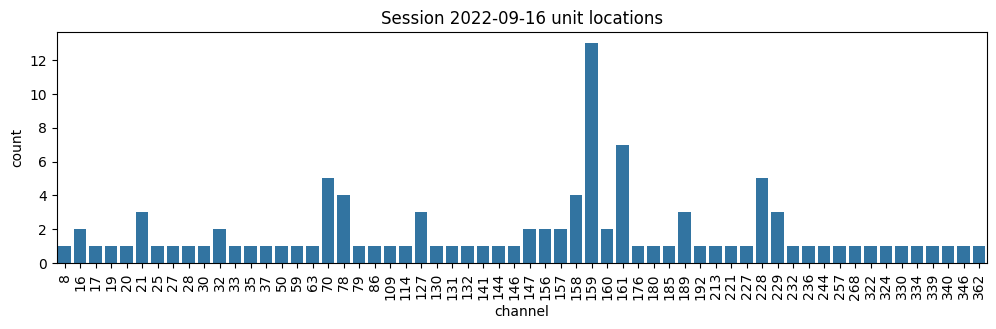

In [ ]:
plt.figure(figsize=(12, 3))
sns.barplot(df.channel.value_counts().sort_index())
plt.title(f'Session {date} unit locations')
plt.xticks(rotation=90)
plt.show()

In [ ]:
start = 300
end = 1500

In [ ]:
spikes = spikes_raw.loc[start:end - 1 / 250, 156:161]
csd = csd_raw.loc[start:end - 1 / 1250, 39:40]

In [ ]:
csd = csd_raw.copy()

In [250]:
b, a = scipy.signal.iirnotch(w0=8, Q=1, fs=1250)

In [251]:
X = csd_raw.values
X = X - scipy.signal.filtfilt(b, a, X, axis=0)
Y = np.angle(scipy.signal.hilbert(X))

KeyboardInterrupt: 

In [ ]:
X.shape

(1500000, 2)

In [ ]:
Y.shape

(1500000, 2)

In [239]:
chan_39 = pd.DataFrame({
    'discharge': x,
    'phase': 0.5 + y / (2 * np.pi)
})

x = csd[40] - scipy.signal.filtfilt(b, a, csd[40])
y = np.angle(scipy.signal.hilbert(x))
chan_40 = pd.DataFrame({
    'discharge': x,
    'phase': 0.5 + y / (2 * np.pi)
})zzzzzzzzzzzz

In [224]:
t1 = pd.date_range(start=0, periods=len(df), freq='0.8ms')
t2 = pd.date_range(start=0, periods=len(df) // 5, freq='4ms')
tmp = df.set_index(t1)
tmp = tmp.reindex(t2).interpolate(method='linear')
df1 = tmp.set_index(df.index[::5])

df2 = spikes.copy()
df2.columns = df2.columns.droplevel('channel')

df = pd.concat([df1, df2], axis=1)

In [225]:
counts = df.iloc[:, 3:].sum(axis=0)
counts

Series([], dtype: float64)

---

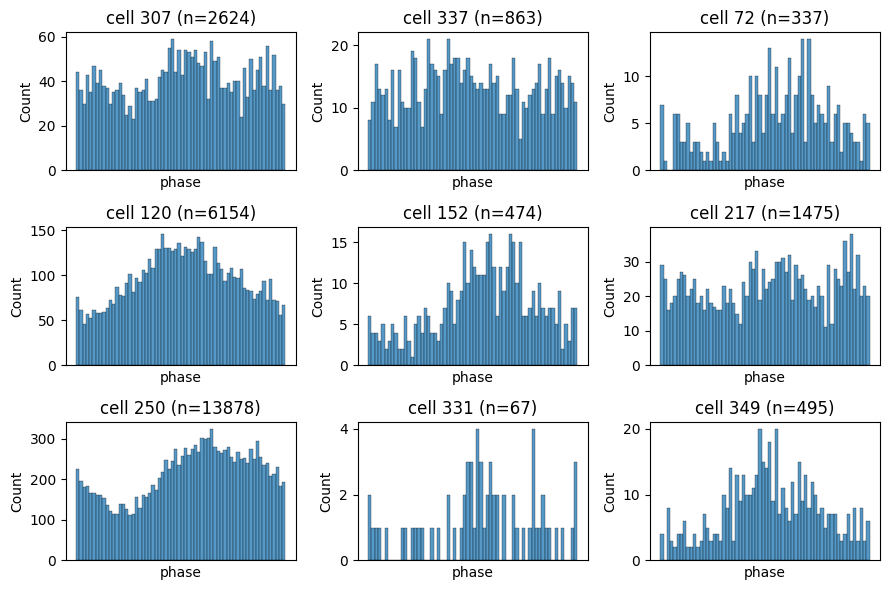

In [139]:
fig, ax = plt.subplots(3, 3, figsize=(9, 6))
for i in range(9):
    plt.sca(ax.flat[i])
    sns.histplot(df.phase[df[counts.index[i]] > 0], bins=64)
    plt.title(f'cell {counts.index[i]} (n={counts.iloc[i]})')
    plt.xticks([])
plt.tight_layout()
plt.show()